# "Análise de Dados: Um olhar sobre os resultados do FSA - Fundo Setorial Audiovisual e Renúncia Fiscal"

## Análise Exploratória

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import catboost
import ydata_profiling as yp
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

---

## Limpeza e Preparação

In [2]:
df_proj_renun_fisc = pd.read_csv('ProjetosRenunciaFiscal.csv')
df_proj_renun_fisc.head(5)
df_proj_renun_fisc_clean = df_proj_renun_fisc[['SALIC', 'TITULO_PROJETO', 'UF_PROPONENTE',
       'SITUACAO_REGISTRO', 'CNPJ_PROPONENTE', 'RAZAO_SOCIAL_PROPONENTE',
       'LEI_8313', 'ART1', 'ART1A', 'ART3', 'ART3A', 'ART39', 'FUNCINES',
       'TOTAL_CAPTADO', 'DT_APROVACAO_CAPTACAO', 'DT_1_LIBERACAO']]

def to_datetime(df, coluna):
    df[coluna] = pd.to_datetime(df[coluna], dayfirst=True)

to_datetime(df_proj_renun_fisc_clean, 'DT_1_LIBERACAO')
to_datetime(df_proj_renun_fisc_clean, 'DT_APROVACAO_CAPTACAO')

def to_datetime_b(df, coluna):
    df['ANO_APROVACAO'] = pd.to_datetime(df[coluna],format='%Y-%m-%d').dt.year


to_datetime_b(df_proj_renun_fisc_clean, 'DT_APROVACAO_CAPTACAO')


df_proj_renun_fisc = df_proj_renun_fisc_clean

#-----------------------------------------------------------

df_invest_proj_renun_fiscal = pd.read_csv('InvestidoresEmProjetosRenunciaFiscal.csv')

#---------------------------------

df_proj_fsa_desemb = pd.read_csv('ProjetosContratadosFSAeDesembolso.csv')
df_proj_fsa_desemb

df_proj_fsa_desemb_clean = df_proj_fsa_desemb[['IDENTIFICACAO_CONTRATO', 'TITULO_PROJETO', 'CHAMADA_PUBLICA',
       'ANO_CHAMADA_PUBLICA', 'CNPJ_PROPONENTE', 'RAZAO_SOCIAL_PROPONENTE',
       'RAZAO_SOCIAL_PRODUTORA',
       'RAZAO_SOCIAL_DISTRIBUIDORA_PROGRAMADORA', 'DT_PUBLICACAO_CONTRATO_DOU',
       'VL_CONTRATO_DOU', 'DT_PRIMEIRO_DESEMBOLSO', 'VL_TOTAL_LIBERADO']]



def to_datetime(df, coluna):
    df[coluna] = pd.to_datetime(df[coluna], dayfirst=True, errors='coerce')

to_datetime(df_proj_fsa_desemb_clean, 'DT_PRIMEIRO_DESEMBOLSO')

def to_datetime_b(df, coluna):
    df[coluna] = pd.to_datetime(df[coluna],format='%Y')

to_datetime_b(df_proj_fsa_desemb_clean, 'ANO_CHAMADA_PUBLICA')


def to_datetime_c(df, coluna, date_format):
    df[coluna] = pd.to_datetime(df[coluna], format=date_format)

to_datetime_c(df_proj_fsa_desemb_clean, 'DT_PUBLICACAO_CONTRATO_DOU', '%Y-%m-%d')

#Preenchendo valores nulos na copluna DT_PRIMEIRO_DESEMBOLSO com a média = 37 dias

df_proj_fsa_desemb_clean_time = df_proj_fsa_desemb_clean.dropna()
df_proj_fsa_desemb_clean_time['TEMPO_DESEMBOLSO'] = df_proj_fsa_desemb_clean['DT_PUBLICACAO_CONTRATO_DOU'] - df_proj_fsa_desemb_clean['DT_PRIMEIRO_DESEMBOLSO']
mean = df_proj_fsa_desemb_clean_time['TEMPO_DESEMBOLSO'].mean()

def to_datetime_a(df, coluna,coluna2):
    df[coluna] = df[coluna].fillna(pd.to_datetime(df[coluna2])+ pd.DateOffset(day=37))

to_datetime_a(df_proj_fsa_desemb_clean, 'DT_PRIMEIRO_DESEMBOLSO', 'DT_PUBLICACAO_CONTRATO_DOU')

df_proj_fsa_desemb = df_proj_fsa_desemb_clean






C:\Users\syafo\AppData\Local\Temp\ipykernel_10004\1130466255.py:19: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[coluna] = pd.to_datetime(df[coluna], dayfirst=True)
C:\Users\syafo\AppData\Local\Temp\ipykernel_10004\1130466255.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna] = pd.to_datetime(df[coluna], dayfirst=True)
C:\Users\syafo\AppData\Local\Temp\ipykernel_10004\1130466255.py:19: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[coluna] = pd.to_datetime(df[coluna], dayfirst=True)
C:\Users\syafo\AppData\Local\Temp\ipykernel

In [3]:
df_proj_renun_fisc

,SALIC,TITULO_PROJETO,UF_PROPONENTE,SITUACAO_REGISTRO,CNPJ_PROPONENTE,RAZAO_SOCIAL_PROPONENTE,LEI_8313,ART1,ART1A,ART3,ART3A,ART39,FUNCINES,TOTAL_CAPTADO,DT_APROVACAO_CAPTACAO,DT_1_LIBERACAO,ANO_APROVACAO
0,04-0353,O DIA EM QUE O BRASIL ESTEVE AQUI,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,190000.0,440000.0,0.0,0.00,0.0,0.00,0.0,630000.00,2005-03-23,2006-12-15,2005
1,06-0305,A Hora e a Vez de Augusto Matraga,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,2604045.0,970000.0,0.00,0.0,0.00,0.0,3574045.00,2007-05-25,2009-07-16,2007
2,06-0412,Estação Liberdade,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,310251.0,1000000.0,0.00,0.0,0.00,0.0,1310251.00,2007-03-07,2010-12-29,2007
3,07-0251,Rio Breaks - Uma Estória de Surfe e Sobrevivên...,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,162500.0,0.0,0.0,0.00,0.0,0.00,0.0,162500.00,2007-12-14,2009-05-15,2007
4,07-0517,O Guia (ex-Cozinha Punk),SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,0.0,0.0,0.00,0.0,704999.78,0.0,704999.78,2008-03-13,2008-10-29,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,00-0333,Tainá Uma Aventura na Amazônia - Distribuição,SP,DEFERIDO,96.274.915/0001-64,TIETÊ PRODUÇÕES CINEMATOGRÁFICAS LTDA,0.0,1330434.0,0.0,859632.64,0.0,0.00,0.0,2190066.64,2000-09-26,2001-02-15,2000
2912,01-3660,Tainá 2 - Aventura Continua (A),SP,DEFERIDO,96.274.915/0001-64,TIETÊ PRODUÇÕES CINEMATOGRÁFICAS LTDA,1737500.0,3000000.0,0.0,1800000.00,0.0,0.00,0.0,6537500.00,2001-10-29,2003-02-20,2001
2913,07-0295,A Margem da Linha,SP,DEFERIDO,96.496.633/0001-01,CINERAMA FILMES-CF EIRELI,260000.0,0.0,0.0,0.00,0.0,0.00,0.0,260000.00,2007-09-05,2010-12-10,2007
2914,13-0522,Economia Brasileira - A História Contada por Q...,SP,IRREGULAR,97.533.170/0001-73,CULTURA MAIOR COMUNICACAO E CULTURA LTDA. - ME,0.0,0.0,1340000.0,0.00,0.0,0.00,0.0,1340000.00,2013-12-24,2014-09-15,2013


---

## EDA - FSA e Renúncia Fiscal - Investidores e Contemplados

- ### Investidores

In [4]:
df_invest_proj_renun_fiscal.head(5)

,CNPJ_INVESTIDOR,INVESTIDOR,ART25,ART18,ART1A,ART1,ART39,ART3A,ART3,ART41,VL_TOTAL_INVESTIDO
0,00.000.000/0001-91,BANCO DO BRASIL S.A.,1.090267e+06,0.0,100000.0,0.00,0.0,0.0,0.0,0.0,1.190267e+06
1,00.000.208/0001-00,BRB - BANCO DE BRASÍLIA S.A.,1.450000e+05,0.0,0.0,129999.18,0.0,0.0,0.0,0.0,2.749992e+05
2,00.001.180/0001-26,CENTRAIS ELÉTRICAS BRASILEIRAS S.A. - ELETROBRÁS,1.250000e+06,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.250000e+06
3,00.001.180/0002-07,ELETROBRÁS - CENTRAIS ELÉTRICAS BRASILEIRAS S.A.,4.196216e+07,455000.0,12380700.2,499630.00,0.0,0.0,0.0,0.0,5.529749e+07
4,00.014.385/0001-46,BV TRADING S/A,0.000000e+00,0.0,0.0,2000.00,0.0,0.0,0.0,0.0,2.000000e+03


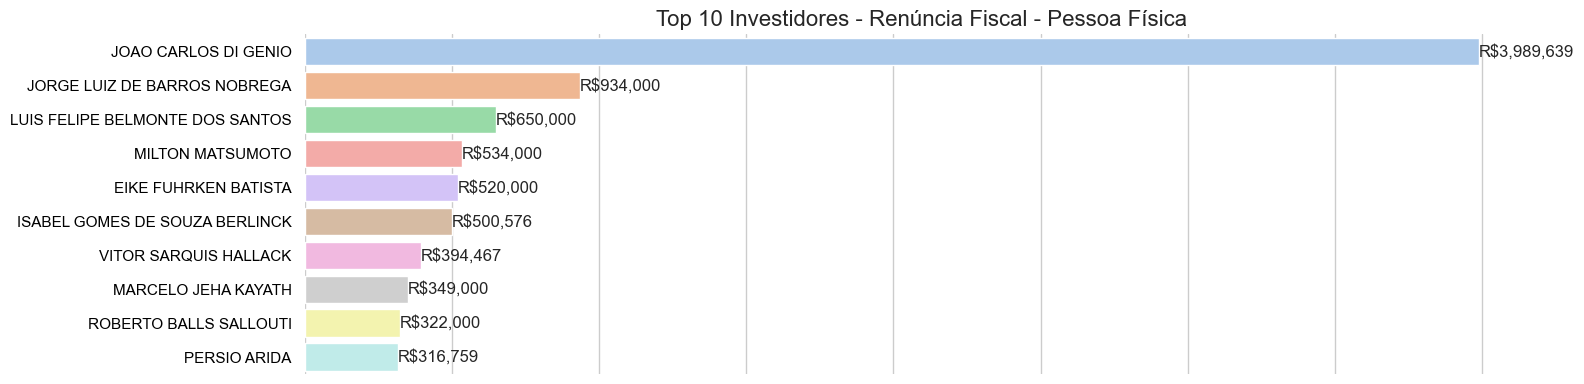

In [5]:
#Top 10 Investidores - Renúncia Fiscal
top_invest = df_invest_proj_renun_fiscal.loc[df_invest_proj_renun_fiscal['CNPJ_INVESTIDOR'] == 'Pessoa Fisica']
top_invest
top_invest_top = top_invest.sort_values(by='VL_TOTAL_INVESTIDO', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="VL_TOTAL_INVESTIDO", y="INVESTIDOR", data=top_invest_top,
            label="VL_TOTAL_INVESTIDO", palette="pastel")

for index, value in enumerate(top_invest_top['VL_TOTAL_INVESTIDO']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Top 10 Investidores - Renúncia Fiscal - Pessoa Física", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


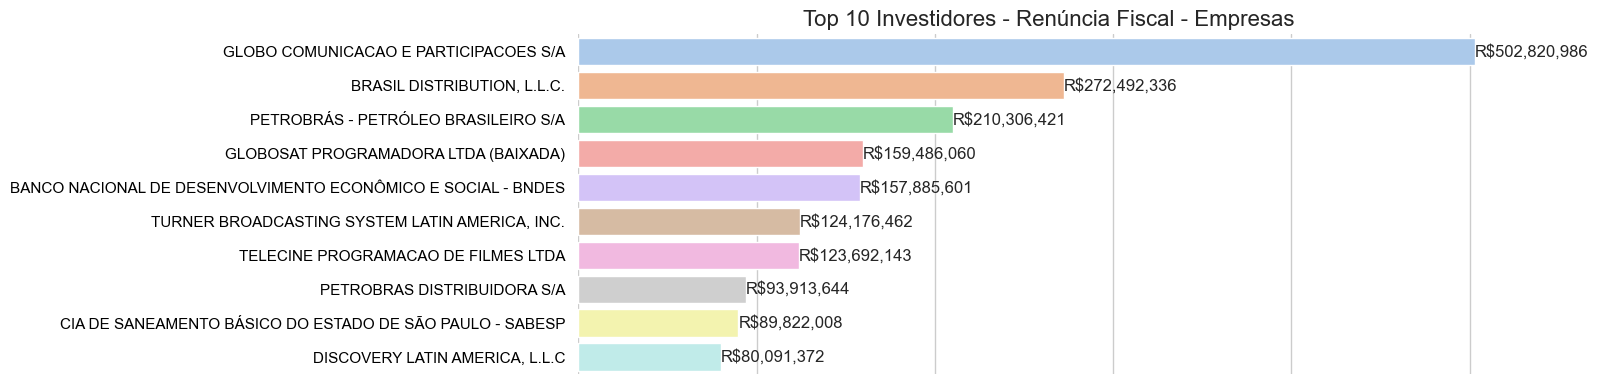

In [6]:
#Top 10 Investidores - Renúncia Fiscal
top_invest = df_invest_proj_renun_fiscal.sort_values(by='VL_TOTAL_INVESTIDO', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="VL_TOTAL_INVESTIDO", y="INVESTIDOR", data=top_invest,
            label="VL_TOTAL_INVESTIDO", palette="pastel")

for index, value in enumerate(top_invest['VL_TOTAL_INVESTIDO']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Top 10 Investidores - Renúncia Fiscal - Empresas", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


- ### Contemplados

In [7]:
df_proj_renun_fisc.head(5)

,SALIC,TITULO_PROJETO,UF_PROPONENTE,SITUACAO_REGISTRO,CNPJ_PROPONENTE,RAZAO_SOCIAL_PROPONENTE,LEI_8313,ART1,ART1A,ART3,ART3A,ART39,FUNCINES,TOTAL_CAPTADO,DT_APROVACAO_CAPTACAO,DT_1_LIBERACAO,ANO_APROVACAO
0,04-0353,O DIA EM QUE O BRASIL ESTEVE AQUI,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,190000.0,440000.0,0.0,0.0,0.0,0.00,0.0,630000.00,2005-03-23,2006-12-15,2005
1,06-0305,A Hora e a Vez de Augusto Matraga,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,2604045.0,970000.0,0.0,0.0,0.00,0.0,3574045.00,2007-05-25,2009-07-16,2007
2,06-0412,Estação Liberdade,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,310251.0,1000000.0,0.0,0.0,0.00,0.0,1310251.00,2007-03-07,2010-12-29,2007
3,07-0251,Rio Breaks - Uma Estória de Surfe e Sobrevivên...,SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,162500.0,0.0,0.0,0.0,0.0,0.00,0.0,162500.00,2007-12-14,2009-05-15,2007
4,07-0517,O Guia (ex-Cozinha Punk),SP,DEFERIDO,00.020.648/0001-20,PRODIGO FILMS LTDA,0.0,0.0,0.0,0.0,0.0,704999.78,0.0,704999.78,2008-03-13,2008-10-29,2008


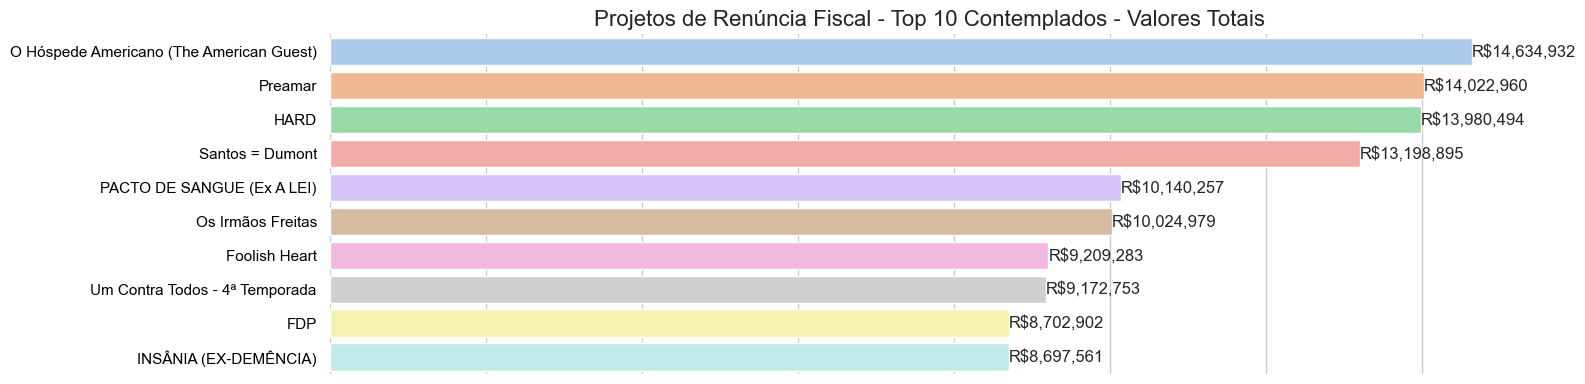

In [8]:
#Top 10 Investidores - Renúncia Fiscal
top_invest = df_proj_renun_fisc.sort_values(by='TOTAL_CAPTADO', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="TOTAL_CAPTADO", y="TITULO_PROJETO", data=top_invest,
            label="TOTAL_CAPTADO", palette="pastel")

for index, value in enumerate(top_invest['TOTAL_CAPTADO']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Projetos de Renúncia Fiscal - Top 10 Contemplados - Valores Totais", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


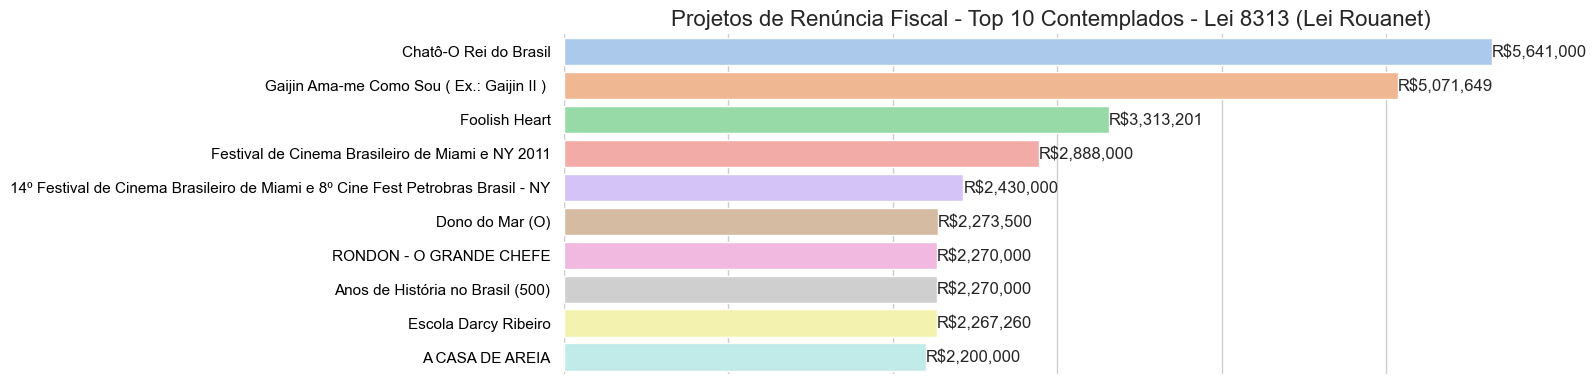

In [9]:
#Top 10 Investidores - Renúncia Fiscal
top_invest = df_proj_renun_fisc.sort_values(by='LEI_8313', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="LEI_8313", y="TITULO_PROJETO", data=top_invest,
            label="LEI_8313", palette="pastel")

for index, value in enumerate(top_invest['LEI_8313']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Projetos de Renúncia Fiscal - Top 10 Contemplados - Lei 8313 (Lei Rouanet)", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


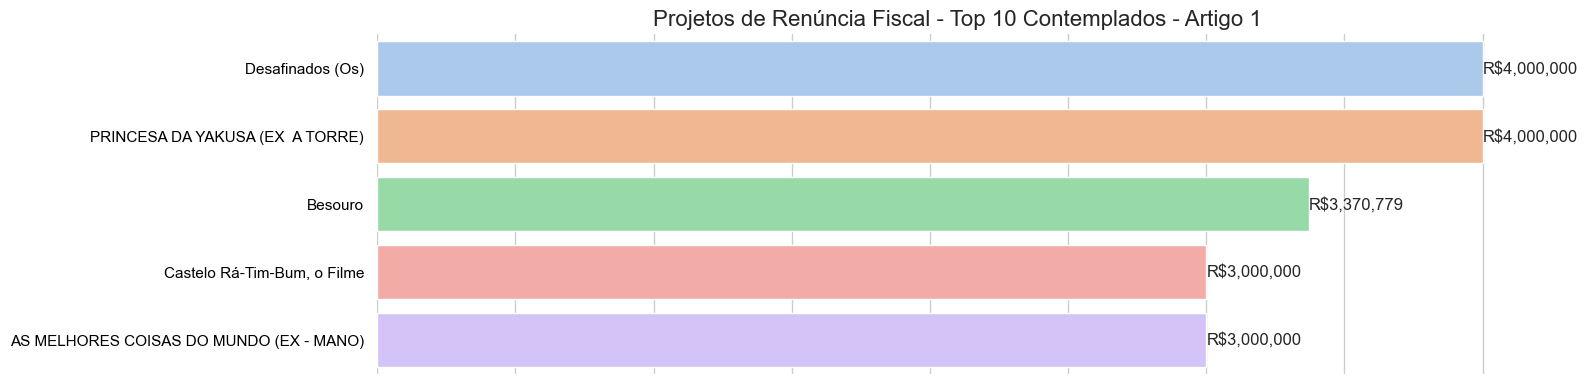

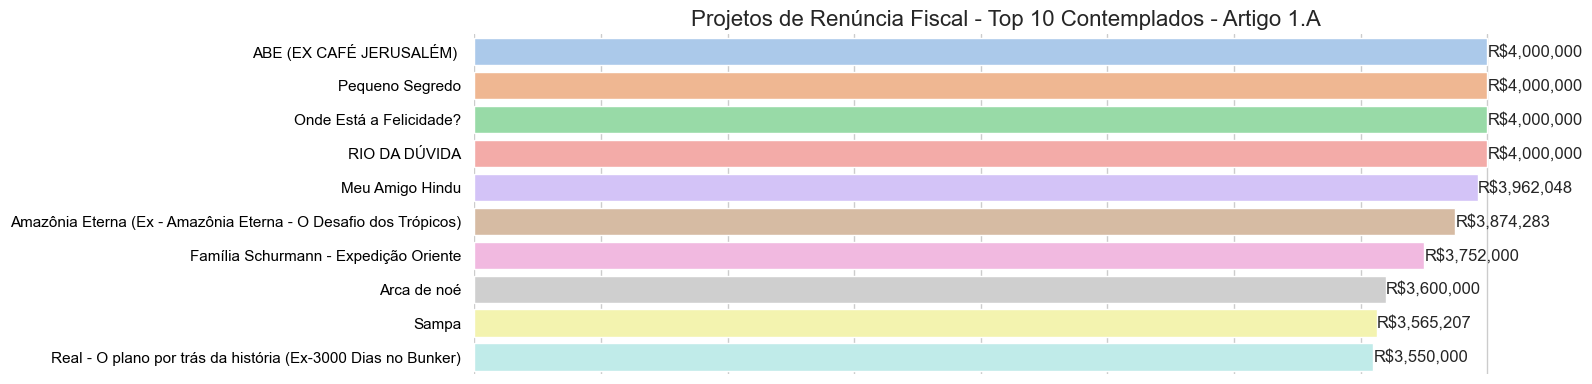

In [10]:

top_invest = df_proj_renun_fisc.sort_values(by='ART1', ascending=False).head(5)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="ART1", y="TITULO_PROJETO", data=top_invest,
            label="ART1", palette="pastel")

for index, value in enumerate(top_invest['ART1']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Projetos de Renúncia Fiscal - Top 10 Contemplados - Artigo 1", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


top_invest = df_proj_renun_fisc.sort_values(by='ART1A', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="ART1A", y="TITULO_PROJETO", data=top_invest,
            label="ART1A", palette="pastel")

for index, value in enumerate(top_invest['ART1A']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Projetos de Renúncia Fiscal - Top 10 Contemplados - Artigo 1.A", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


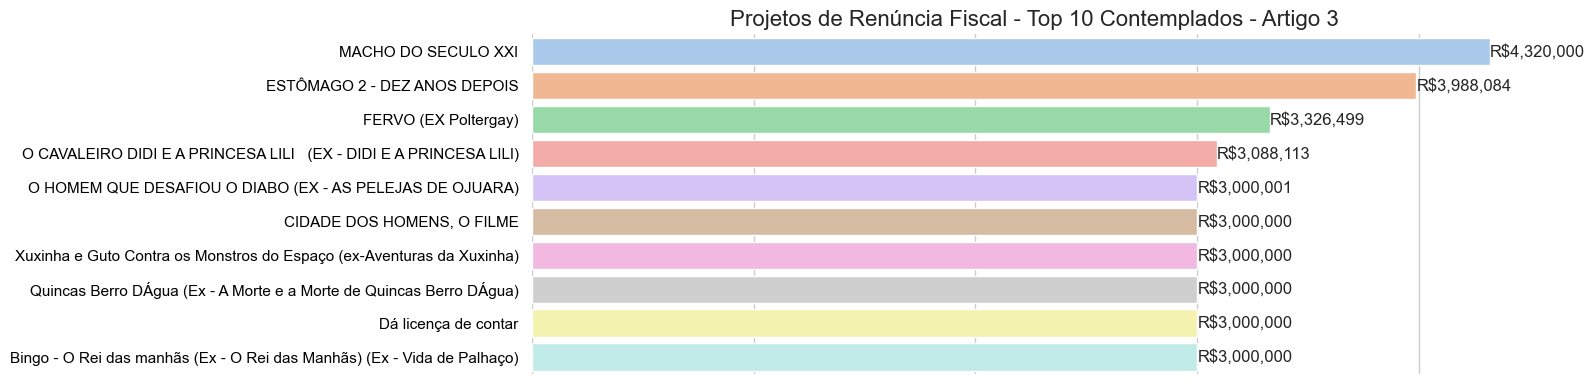

In [11]:
#Top 10 Investidores - Renúncia Fiscal
top_invest = df_proj_renun_fisc.sort_values(by='ART3', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="ART3", y="TITULO_PROJETO", data=top_invest,
            label="ART3", palette="pastel")

for index, value in enumerate(top_invest['ART3']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Projetos de Renúncia Fiscal - Top 10 Contemplados - Artigo 3", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


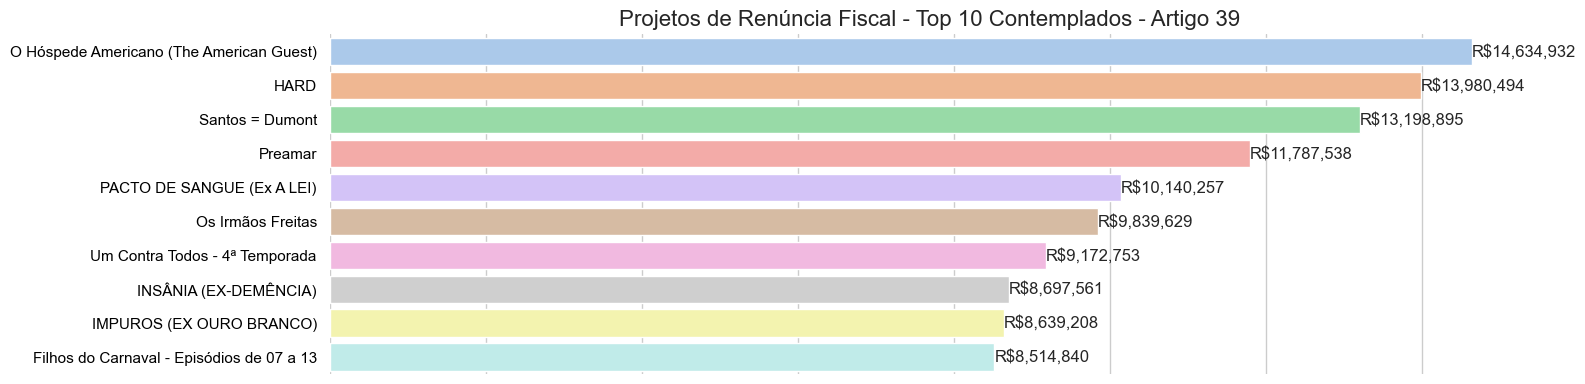

In [12]:
#Top 10 Investidores - Renúncia Fiscal
top_invest = df_proj_renun_fisc.sort_values(by='ART39', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="ART39", y="TITULO_PROJETO", data=top_invest,
            label="ART39", palette="pastel")

for index, value in enumerate(top_invest['ART39']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Projetos de Renúncia Fiscal - Top 10 Contemplados - Artigo 39", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


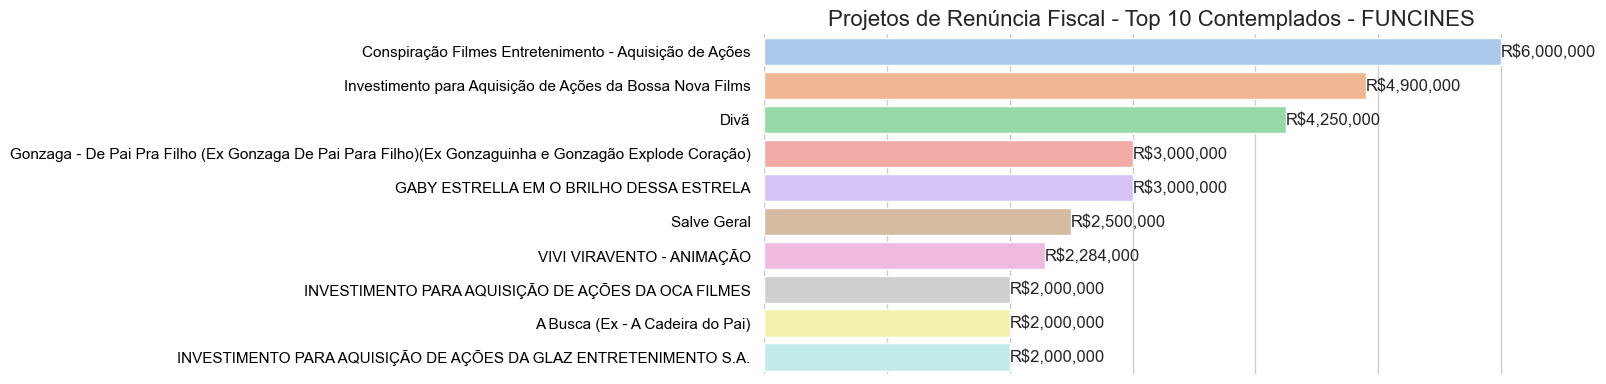

In [13]:
#Top 10 Investidores - Renúncia Fiscal
top_invest = df_proj_renun_fisc.sort_values(by='FUNCINES', ascending=False).head(10)

plt.figure(figsize=(16, 4))
sns.set_theme(style="whitegrid")


sns.set_color_codes("pastel")
sns.barplot(x="FUNCINES", y="TITULO_PROJETO", data=top_invest,
            label="FUNCINES", palette="pastel")

for index, value in enumerate(top_invest['FUNCINES']):
    plt.text(value, index, f'R${value:,.0f}', va='center', fontsize=12)

plt.xlabel("")
plt.ylabel("")
plt.title("Projetos de Renúncia Fiscal - Top 10 Contemplados - FUNCINES", fontsize=16)

sns.despine(left=True, bottom=True)

plt.yticks(color='black')

def format_labels(value, pos):
    return 

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_labels))
plt.tight_layout()
plt.show()


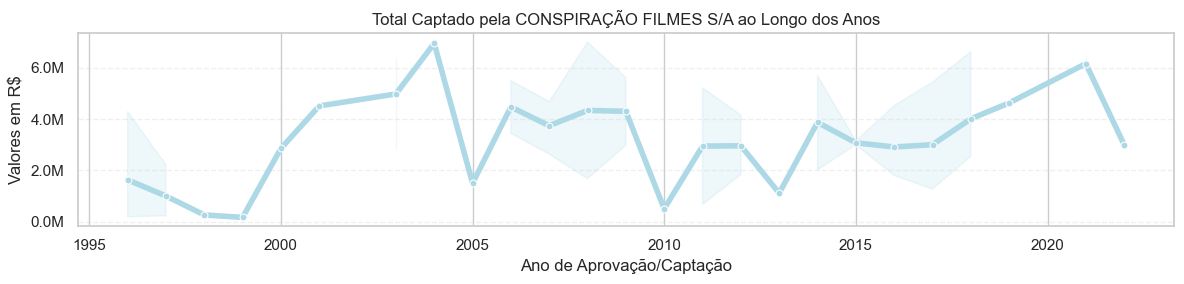

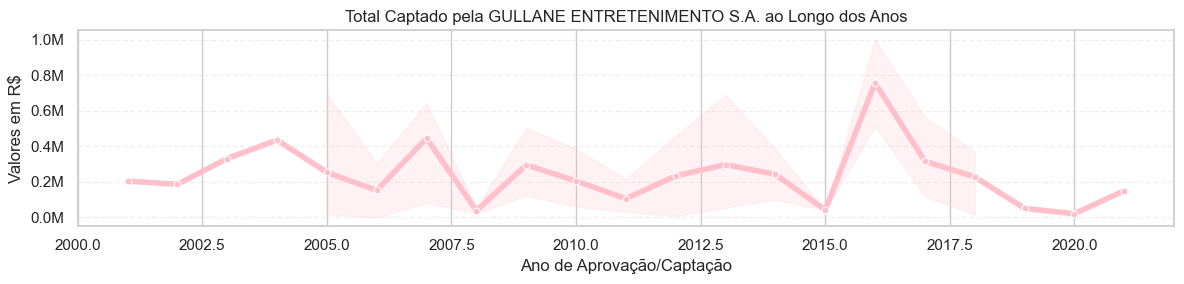

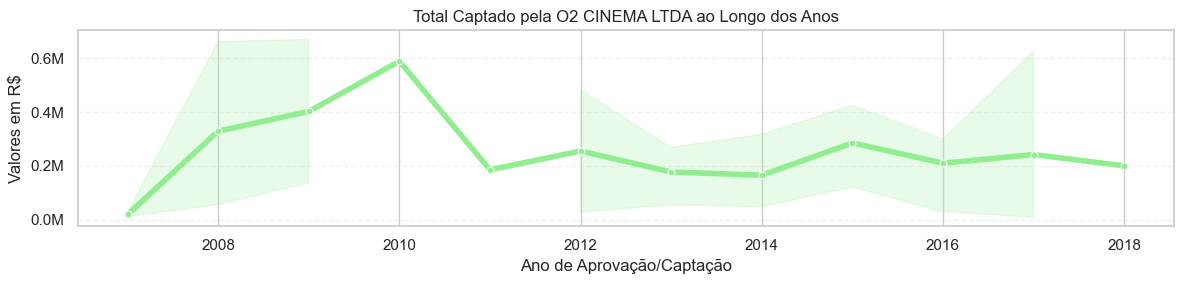

In [47]:
df = df_proj_renun_fisc[df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'] == 'CONSPIRAÇÃO FILMES S/A'].sort_values(by='ANO_APROVACAO')
plt.figure(figsize=(12, 3))

# Using a bold line style and increasing the size
sns.lineplot(data=df, x='ANO_APROVACAO', y='TOTAL_CAPTADO', marker='o', markersize=5, linewidth=4, color='lightblue')

# Using a different color palette
sns.set_palette("mako_r")

def currency_formatter(y, pos):
    return "{:.1f}M".format(y / 1000000)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.xlabel('Ano de Aprovação/Captação')
plt.ylabel('Valores em R$')
plt.title('Total Captado pela CONSPIRAÇÃO FILMES S/A ao Longo dos Anos')

plt.tight_layout()
plt.show()

#--------------------------------------------------


df2 = df_proj_renun_fisc[df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'] == 'GULLANE ENTRETENIMENTO S.A.'].sort_values(by='ANO_APROVACAO')
plt.figure(figsize=(12, 3))

# Using a bold line style and increasing the size
sns.lineplot(data=df2, x='ANO_APROVACAO', y='TOTAL_CAPTADO', marker='o', markersize=5, linewidth=4, color='pink')

# Using a different color palette
sns.set_palette("mako_r")

def currency_formatter(y, pos):
    return "{:.1f}M".format(y / 10000000)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.xlabel('Ano de Aprovação/Captação')
plt.ylabel('Valores em R$')
plt.title('Total Captado pela GULLANE ENTRETENIMENTO S.A. ao Longo dos Anos')

plt.tight_layout()
plt.show()

#--------------------------------------------------


df2 = df_proj_renun_fisc[df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'] == 'O2 CINEMA LTDA'].sort_values(by='ANO_APROVACAO')
plt.figure(figsize=(12, 3))

# Using a bold line style and increasing the size
sns.lineplot(data=df2, x='ANO_APROVACAO', y='TOTAL_CAPTADO', marker='o', markersize=5, linewidth=4, color='lightgreen')

# Using a different color palette
sns.set_palette("mako_r")

def currency_formatter(y, pos):
    return "{:.1f}M".format(y / 10000000)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.xlabel('Ano de Aprovação/Captação')
plt.ylabel('Valores em R$')
plt.title('Total Captado pela O2 CINEMA LTDA ao Longo dos Anos')

plt.tight_layout()
plt.show()


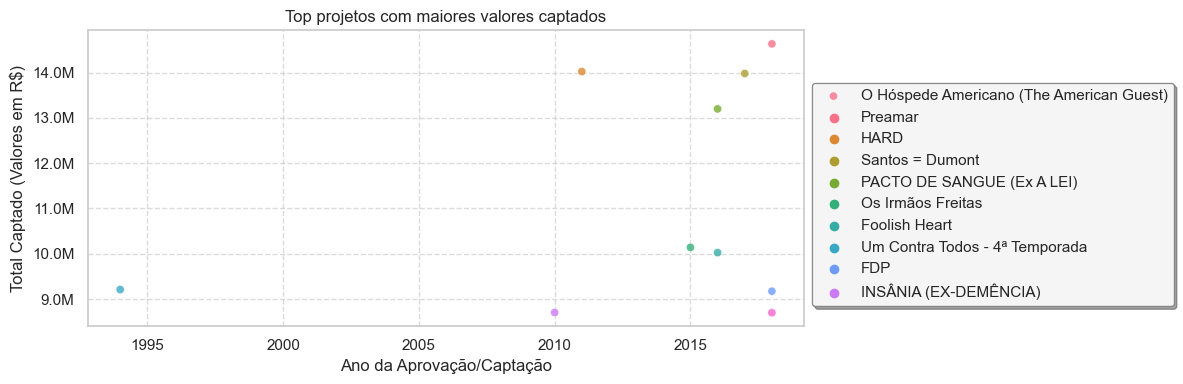

In [34]:
conspira_nome = {'CONSPIRAÇÃO FILMES ENTRETENIMENTO 3º MILÊNIO LTDA.': 'CONSPIRAÇÃO FILMES S/A'}
df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'] = df_proj_renun_fisc['RAZAO_SOCIAL_PROPONENTE'].replace(conspira_nome)

top_proj_renun_fisc = df_proj_renun_fisc.sort_values(by='TOTAL_CAPTADO', ascending=False).head(10)
plt.figure(figsize=(12, 4))

# Using a larger marker size for better visibility
sns.scatterplot(data=top_proj_renun_fisc, x='ANO_APROVACAO', y='TOTAL_CAPTADO', 
                alpha=0.8, hue='TITULO_PROJETO')

plt.xlabel('Ano da Aprovação/Captação')
plt.ylabel('Total Captado (Valores em R$)')
plt.title('Top projetos com maiores valores captados')

# Show grid lines for better readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Specify the desired project titles for the legend
legend_labels = ['O Hóspede Americano (The American Guest)', 'Preamar', 'HARD', 'Santos = Dumont', 'PACTO DE SANGUE (Ex A LEI)', 
                 'Os Irmãos Freitas', 'Foolish Heart', 'Um Contra Todos - 4ª Temporada', 'FDP', 'INSÂNIA (EX-DEMÊNCIA)']

# Show the legend with the specified labels and background color
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 0.848), labelspacing=0.5, framealpha=0.9, frameon=True, shadow=True, edgecolor='gray')

def currency_formatter(y, pos):
    return "{:.1f}M".format(y / 1000000)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.tight_layout()
plt.show()


---

## EDA - FSA - Fundo Setorial Audiovisual

In [22]:
df_proj_fsa_desemb.head(5)

,IDENTIFICACAO_CONTRATO,TITULO_PROJETO,CHAMADA_PUBLICA,ANO_CHAMADA_PUBLICA,CNPJ_PROPONENTE,RAZAO_SOCIAL_PROPONENTE,RAZAO_SOCIAL_PRODUTORA,RAZAO_SOCIAL_DISTRIBUIDORA_PROGRAMADORA,DT_PUBLICACAO_CONTRATO_DOU,VL_CONTRATO_DOU,DT_PRIMEIRO_DESEMBOLSO,VL_TOTAL_LIBERADO
0,02.09.0557.00,DE PERNAS PRO AR,PRODECINE 02,2008-01-01,07.616.202/0001-01,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,MORENA FILMES EIRELI - ME,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-08,3000000.0,2009-12-21,3000000.0
1,02.09.0558.00,DESENROLA,PRODECINE 02,2008-01-01,07.616.202/0001-01,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,RACCORD PRODUÇÕES ARTÍSTICAS E CINEMATOGRÁFICA...,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-08,2000000.0,2009-12-21,2000000.0
2,02.09.0601.00,HISTÓRIAS DE AMOR DURAM APENAS 90 MINUTOS,PRODECINE 01,2008-01-01,31.939.739/0001-97,TIPOS E TEMPOS PRODUÇÕES LTDA,TIPOS E TEMPOS PRODUÇÕES LTDA,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-24,300000.0,2010-01-13,300000.0
3,02.09.0592.00,INSOLAÇÃO,PRODECINE 01,2008-01-01,05.919.250/0001-43,"CISMA PRODUÇÕES CINEMATOGRÁFICAS, EVENTOS E TE...","CISMA PRODUÇÕES CINEMATOGRÁFICAS, EVENTOS E TE...",CANNES PRODUÇÕES S/A,2009-12-24,500000.0,2010-01-15,500000.0
4,02.09.0614.00,DO COMEÇO AO FIM,PRODECINE 01,2008-01-01,03.838.776/0001-73,HARE FILMES PRODUCOES LTDA - ME,HARE FILMES PRODUCOES LTDA - ME,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,2009-12-29,461740.0,2010-01-13,461740.0


In [61]:
mapping = {
    'PRODAV 01': 'PRODAV',
    'PRODAV 02': 'PRODAV',
    'PRODAV 03': 'PRODAV',
    'PRODAV 04': 'PRODAV',
    'PRODAV 05': 'PRODAV',
    'PRODAV 06': 'PRODAV',
    'PRODAV 07': 'PRODAV',
    'PRODAV 08': 'PRODAV',
    'PRODAV 09': 'PRODAV',
    'PRODAV 10': 'PRODAV',
    'PRODAV 11': 'PRODAV',
    'PRODAV 12': 'PRODAV',
    'PRODAV 13': 'PRODAV',
    'PRODAV 14': 'PRODAV',
    'PRODAV 02 - PROJETO DERIVADO': 'PRODAV',
    'PRODAV - TVS PÚBLICAS': 'PRODAV',
    'PRODAV 06/SUPORTE AUTOMÁTICO - DESEMPENHO COMERCIAL CINEMA': 'PRODAV',
    'PRODAV 07/SUPORTE AUTOMÁTICO - DESEMPENHO COMERCIAL CINEMA': 'PRODAV',
    'PRODAV 06/PRODAV 07': 'PRODAV',
    'PRODECINE 01': 'PRODECINE',
    'PRODECINE 02': 'PRODECINE',
    'PRODECINE 03': 'PRODECINE',
    'PRODECINE 04': 'PRODECINE',
    'PRODECINE 05': 'PRODECINE',
    'PRODECINE 06': 'PRODECINE',
    'PRODECINE 07': 'PRODECINE',
    'PRODECINE 08': 'PRODECINE',
    'PRODECINE 09': 'PRODECINE',
    'PRODECINE 10': 'PRODECINE',
    'PRODECINE 11': 'PRODECINE',
    'PRODECINE 12': 'PRODECINE',
    'PRODECINE 13': 'PRODECINE',
    'SAV/MINC 01': 'SAV/MINC',
    'SAV/MINC 02': 'SAV/MINC',
    'SAV/MINC 03': 'SAV/MINC',
    'SAV/MINC 04': 'SAV/MINC',
    'SAV/MINC 05': 'SAV/MINC',
    'SAV/MINC 06': 'SAV/MINC',
    'SAV/MINC 07': 'SAV/MINC',
    'SAV/MINC 08': 'SAV/MINC',
    'SAV/MINC 09': 'SAV/MINC',
    'SAV/MINC 10': 'SAV/MINC',
    'SAV/MINC 11': 'SAV/MINC',
    'SAV/MINC 12': 'SAV/MINC',
    'SAV/MINC 13': 'SAV/MINC',
    'SAV/MINC 14': 'SAV/MINC',
    'SAV/MINC 15': 'SAV/MINC',
}
chamada_publica = df_proj_fsa_desemb
chamada_publica['CHAMADA_PUBLICA'].replace(mapping, inplace=True)


top_10 = df_proj_fsa_desemb.sort_values('VL_TOTAL_LIBERADO', ascending=False).head(10)
chamada_publica['CHAMADA_PUBLICA']. value_counts()

CHAMADA_PUBLICA
PRODAV                                                                                                           1979
PRODECINE                                                                                                         785
ARRANJOS REGIONAIS                                                                                                402
SAV/MINC                                                                                                          318
PROGRAMA ESPECIAL DE APOIO AO PEQUENO EXIBIDOR  PEAPE                                                            149
CRÉDITO EMERGENCIAL FSA                                                                                           132
COMERCIALIZAÇÃO EM CINEMA                                                                                          92
FLUXO CONTÍNUO PRODUÇÃO PARA CINEMA                                                                                63
CONCURSO PRODUÇÃO PARA CINEMA           

---